# Análise do Histórico de Code Samples e o Impacto a Comunidade 

In [1]:
import os
os.chdir('C:\\Users\\dudur\\Documents\\gabrielsmenezes\\pesquisamestrado')

## Carregando as métricas evolutivas

In [2]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import scipy.stats as stats

In [3]:
# samples_android = pd.read_csv("listofsamples\\googlesamples.txt", sep="\n", header=None, names=["path"])
# samples_aws = pd.read_csv("listofsamples\\awssamples.txt", sep="\n", header=None, names=["path"])
# samples_azure = pd.read_csv("listofsamples\\azuresamples.txt", sep="\n", header=None, names=["path"])
# samples_spring = pd.read_csv("listofsamples\\springsamples.txt", sep="\n", header=None, names=["path"])

# samples_android["path"] = samples_android["path"].str.replace("/", "\\\\")
# samples_aws["path"] = samples_aws["path"].str.replace("/", "\\\\")
# samples_azure["path"] = samples_azure["path"].str.replace("/", "\\\\")
# samples_spring["path"] = samples_spring["path"].str.replace("/", "\\\\")

In [4]:
# samples = pd.concat([samples_android, samples_aws, samples_azure, samples_spring], axis=0)

In [5]:
list_samples = pd.read_csv("SBCARS2020\\samples.txt", sep="\n", header=None, names=["path"])
list_samples["windows_path"] = list_samples["path"].str.replace("/", "\\\\")

In [6]:
samples = [pd.read_csv("metricsbycommits\\"+sample+"__output.csv", usecols=[3,4,5,6,7], parse_dates=True) for sample in list_samples["windows_path"]]

In [7]:
df_metrics = pd.concat(samples, axis=0, ignore_index=True)

In [8]:
# df_metrics = df_metrics[(df_metrics[['numberOfJavaFiles']] != 0).all(axis=1)]

In [9]:
df_metrics.sort_values(by="date")

,date,numberOfJavaFiles,countLineCode/numberOfJavaFiles,SumCyclomaticStrict/CountDeclMethod,readability
2602,2013-04-12 09:56:22-05:00,0,0.00000,0.000000,0.000000
2603,2013-04-12 10:00:06-05:00,0,0.00000,0.000000,0.000000
2604,2013-04-12 10:02:52-05:00,0,0.00000,0.000000,0.000000
2605,2013-04-12 10:07:31-05:00,0,0.00000,0.000000,0.000000
2606,2013-04-12 10:12:31-05:00,0,0.00000,0.000000,0.000000
...,...,...,...,...,...
1075,2020-06-10 18:56:03-07:00,27,95.37037,1.867580,0.005426
4358,2020-06-11 11:32:02+01:00,143,135.20979,1.904694,0.020712
1076,2020-06-11 16:11:08+00:00,27,95.37037,1.867580,0.005426
4359,2020-06-19 17:28:54+01:00,143,135.20979,1.904694,0.020712


In [10]:
df_metrics['date'] = pd.to_datetime(df_metrics['date'].astype(str).str[:-6])

In [11]:
df_metrics.sort_values(by="date", inplace=True)

In [12]:
df_metrics.set_index(df_metrics["date"], inplace=True)

In [13]:
df_metrics.index

DatetimeIndex(['2013-04-12 09:56:22', '2013-04-12 10:00:06',
               '2013-04-12 10:02:52', '2013-04-12 10:07:31',
               '2013-04-12 10:12:31', '2013-04-15 08:40:37',
               '2013-04-15 08:50:04', '2013-04-15 08:53:12',
               '2013-04-15 10:30:11', '2013-04-15 12:23:31',
               ...
               '2020-05-27 13:38:09', '2020-06-03 09:28:16',
               '2020-06-06 00:32:11', '2020-06-07 16:36:36',
               '2020-06-08 21:28:54', '2020-06-10 18:56:03',
               '2020-06-11 11:32:02', '2020-06-11 16:11:08',
               '2020-06-19 17:28:54', '2020-06-19 17:32:02'],
              dtype='datetime64[ns]', name='date', length=9470, freq=None)

In [14]:
del df_metrics["date"]

In [15]:
df_metrics = df_metrics.groupby([(df_metrics.index.year), (df_metrics.index.month)]).mean()

In [16]:
df_metrics.sort_values(by="readability", ascending=False)

numberOfJavaFiles  countLineCode/numberOfJavaFiles  \
date date                                                       
2013 12             4.064516                        18.895699   
     10             3.294118                        21.953431   
     9              3.386076                        22.505802   
     11             3.470085                        21.776496   
2014 1              3.444444                        21.204497   
...                      ...                              ...   
2018 2             28.615385                       215.125137   
     12            81.224490                        85.689577   
2016 3             34.448718                       120.978599   
2017 12            48.925926                       182.215133   
2020 6             63.777778                       101.371988   

           SumCyclomaticStrict/CountDeclMethod  readability  
date date                                                    
2013 12                               1.087366     0.355237  
     10                               1.104721     0.324579  
     9                                1.137413     0.298186  
     11                               1.105540     0.298019  
2014 1                                1.156321     0.295800  
...                                        ...          ...  
2018 2                                1.839535     0.020528  
     12                               1.593344     0.020240  
2016 3                                1.764631     0.016875  
2017 12                               1.869577     0.014920  
2020 6                                1.889374     0.011999  

[87 rows x 4 columns]

In [17]:
df_metrics.describe()

,numberOfJavaFiles,countLineCode/numberOfJavaFiles,SumCyclomaticStrict/CountDeclMethod,readability
count,87.000000,87.000000,87.000000,87.000000
mean,22.736813,82.377900,1.471870,0.128705
std,18.302964,53.994644,0.255346,0.085979
min,2.906250,10.713542,0.705357,0.011999
25%,8.240085,45.696346,1.296368,0.061240
50%,20.473684,75.192828,1.494576,0.119820
75%,29.259500,100.603203,1.639134,0.183901
max,81.224490,346.992068,2.122263,0.355237


## Carregando as métricas das perguntas do Stack Overflow

In [18]:
df = [pd.read_csv("stackoverflow\\"+sample+"_questions_and_answers_output.csv", usecols=[1,7], parse_dates=True) for sample in ["android", "aws", "azure", "spring"] ]
df_stackoverflow = pd.concat(df, axis=0, ignore_index=True)

In [19]:
# Get names of indexes for which column Age has value 30
indexNames = df_stackoverflow[~df_stackoverflow['path'].isin(list_samples["path"])].index
# Delete these row indexes from dataFrame
df_stackoverflow.drop(indexNames , inplace=True)

In [20]:
df_stackoverflow['question_creation_date'] = pd.to_datetime(df_stackoverflow['question_creation_date'])
df_stackoverflow.sort_values(by="question_creation_date", inplace=True)
df_stackoverflow.set_index(df_stackoverflow['question_creation_date'], inplace=True)
df_stackoverflow["count_questions"] = 1
df_stackoverflow=df_stackoverflow.groupby([(df_stackoverflow.index.year), (df_stackoverflow.index.month)]).sum()

In [21]:
df_stackoverflow.index

MultiIndex([(2013, 11),
            (2014,  3),
            (2014,  4),
            (2014,  6),
            (2014,  7),
            (2014, 10),
            (2014, 11),
            (2014, 12),
            (2015,  1),
            (2015,  2),
            (2015,  3),
            (2015,  4),
            (2015,  5),
            (2015,  6),
            (2015,  7),
            (2015,  8),
            (2015,  9),
            (2015, 10),
            (2015, 11),
            (2015, 12),
            (2016,  1),
            (2016,  2),
            (2016,  3),
            (2016,  4),
            (2016,  5),
            (2016,  6),
            (2016,  7),
            (2016,  8),
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (201

## Mergeando os dois conjuntos

In [22]:
df = pd.concat([df_metrics,df_stackoverflow], axis=1)
df["count_questions"].fillna(0, inplace=True)
df.fillna(method="ffill", inplace=True)

## Normalização dos dados

In [23]:
normalized_df=(df-df.min())/(df.max()-df.min())

## Visão geral das métricas

In [24]:
normalized_df

numberOfJavaFiles  countLineCode/numberOfJavaFiles  \
2013 4           0.001729                         0.000000   
     5           0.017858                         0.028401   
     6           0.002616                         0.044566   
     7           0.001197                         0.043706   
     8           0.005885                         0.037019   
...                   ...                              ...   
2020 2           0.293807                         0.119084   
     3           0.206047                         0.219137   
     4           0.119305                         0.099410   
     5           0.392986                         0.087608   
     6           0.777233                         0.269593   

        SumCyclomaticStrict/CountDeclMethod  readability  count_questions  
2013 4                             0.000000     0.620786         0.000000  
     5                             0.243506     0.666997         0.000000  
     6                             0.268754     0.668545         0.000000  
     7                             0.286917     0.720394         0.000000  
     8                             0.303452     0.804050         0.000000  
...                                     ...          ...              ...  
2020 2                             0.580341     0.397256         0.266667  
     3                             0.731292     0.050444         0.066667  
     4                             0.407147     0.353219         0.533333  
     5                             0.588472     0.672994         0.200000  
     6                             0.835635     0.000000         0.133333  

[87 rows x 5 columns]

### Gráfico do número de arquivos Java

In [25]:
time = pd.DataFrame(df.index.values.tolist(), columns=['year','month'])
time["day"] = 1
time

,year,month,day
0,2013,4,1
1,2013,5,1
2,2013,6,1
3,2013,7,1
4,2013,8,1
...,...,...,...
82,2020,2,1
83,2020,3,1
84,2020,4,1
85,2020,5,1


In [26]:
df.set_index(pd.to_datetime(time), inplace=True)
normalized_df.set_index(pd.to_datetime(time), inplace=True)

In [27]:
df["numberOfJavaFiles"]

2013-04-01     3.041667
2013-05-01     4.304878
2013-06-01     3.111111
2013-07-01     3.000000
2013-08-01     3.367133
                ...    
2020-02-01    25.916667
2020-03-01    19.043478
2020-04-01    12.250000
2020-05-01    33.684211
2020-06-01    63.777778
Name: numberOfJavaFiles, Length: 87, dtype: float64

In [28]:
df["countLineCode/numberOfJavaFiles"].mode()

0      10.713542
1      18.895699
2      20.264141
3      20.988542
4      21.204497
         ...    
82    182.215133
83    183.295137
84    215.125137
85    227.308734
86    346.992068
Length: 87, dtype: float64

In [29]:
stats.mode(df[""].to_numpy())

KeyError: ''

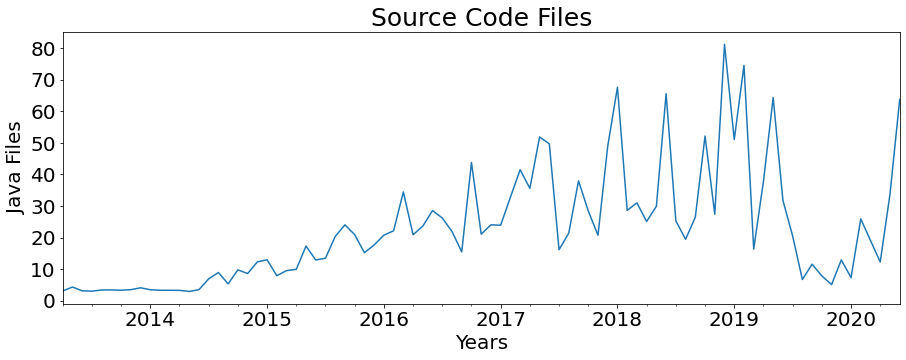

In [30]:
subplot = df["numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Source Code Files", fontsize=25)
subplot.set_ylabel("Java Files", fontsize=20)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/arquivosJava.pdf",bbox_inches = 'tight')

### Gráfico do número linhas de código por arquivo Java

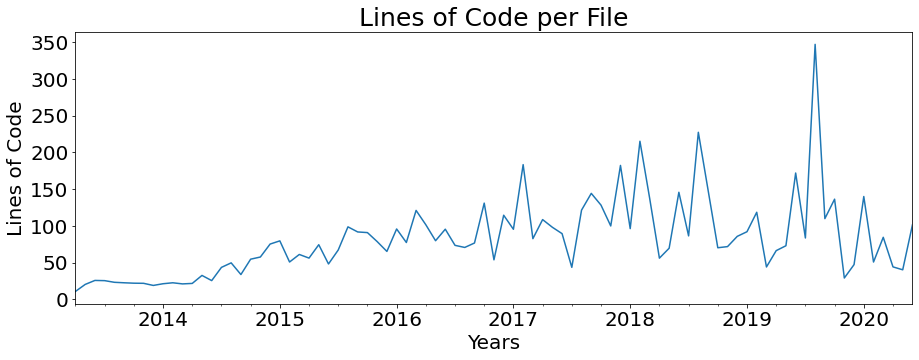

In [31]:
subplot = df["countLineCode/numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Lines of Code per File", fontsize=25)
subplot.set_ylabel("Lines of Code", fontsize=20)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/loc.pdf",bbox_inches = 'tight')

### Gráfico da complexidade por método

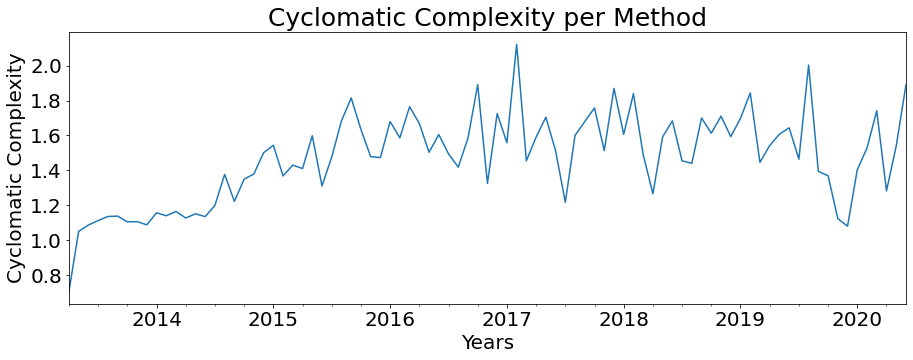

In [32]:
subplot = df["SumCyclomaticStrict/CountDeclMethod"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Cyclomatic Complexity per Method", fontsize=25)
subplot.set_ylabel("Cyclomatic Complexity", fontsize=20)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/cc.pdf",bbox_inches = 'tight')

### Gráfico da readability por arquivo Java

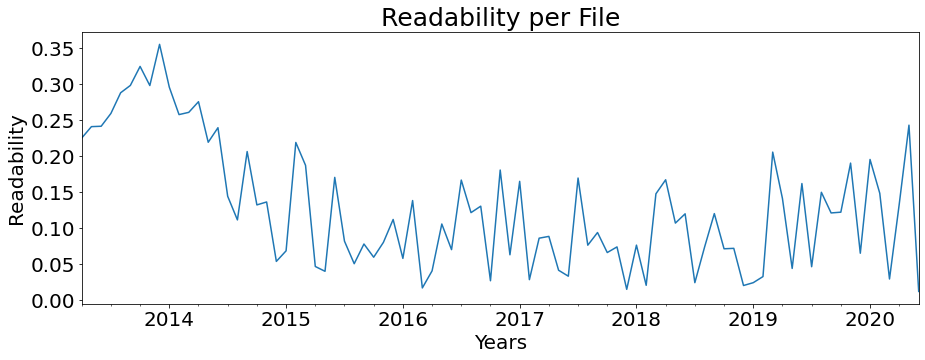

In [33]:
subplot = df["readability"].plot(figsize=(15,5), fontsize=20)
subplot.set_title("Readability per File", fontsize=25)
subplot.set_ylabel("Readability", fontsize=20)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/readability.pdf",bbox_inches = 'tight')

## Teste de Mann Kendall

Hipótese nula: Não há tendência monotonica.

Hipótese alternativa: Existe uma tendência.

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [34]:
pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pymannkendall as mk

### Teste de tendência (MannKendallTest) para número de arquivos Java

In [111]:
mk.original_test(normalized_df["numberOfJavaFiles"])

Mann_Kendall_Test(trend='increasing', h=True, p=2.0618173834918707e-11, z=6.701577996875844, Tau=0.4889067094359797, s=1829.0, var_s=74404.33333333333, slope=0.005388617602332612, intercept=-0.007402218813242073)

### Teste de tendência (MannKendallTest) para número linhas de código por arquivo Java

In [112]:
mk.original_test(normalized_df["countLineCode/numberOfJavaFiles"])

Mann_Kendall_Test(trend='increasing', h=True, p=8.260055750497486e-09, z=5.763063791624084, Tau=0.42047580860732425, s=1573.0, var_s=74404.33333333333, slope=0.0033990105861291184, intercept=0.04558623766206954)

### Teste de tendência (MannKendallTest) para complexidade por método

In [113]:
mk.original_test(normalized_df["SumCyclomaticStrict/CountDeclMethod"])

Mann_Kendall_Test(trend='increasing', h=True, p=2.445497704339772e-07, z=5.161828128884676, Tau=0.37663726276396686, s=1409.0, var_s=74404.33333333333, slope=0.0041426374933560784, intercept=0.3788684675620806)

### Teste de tendência (MannKendallTest) para readability por arquivo Java

In [114]:
mk.original_test(normalized_df["readability"])

Mann_Kendall_Test(trend='decreasing', h=True, p=4.155354602919381e-05, z=-4.098667505747918, Tau=-0.2991178829190056, s=-1119.0, var_s=74404.33333333333, slope=-0.004597676681067195, intercept=0.5118290630579906)

### Teste de tendência (MannKendallTest) para número de perguntas no SO

In [115]:
mk.original_test(normalized_df["count_questions"])

Mann_Kendall_Test(trend='increasing', h=True, p=0.00015208047793358048, z=3.7876473780909556, Tau=0.2753274525527934, s=1030.0, var_s=73806.0, slope=0.005649717514124295, intercept=0.15706214689265535)

## Teste de Normalidade

Hipótese nula: A população tem distribuição normal

Hipótese alternativa: A população não tem distribuição normal

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [116]:
from scipy import stats

### Teste de normalidade (Shapiro-Wilk) para número de arquivos Java

In [117]:
stats.shapiro(normalized_df["numberOfJavaFiles"])

ShapiroResult(statistic=0.8799844980239868, pvalue=8.166693419298099e-07)

### Teste de normalidade (Shapiro-Wilk) para número linhas de código por arquivo Java

In [118]:
stats.shapiro(normalized_df["countLineCode/numberOfJavaFiles"])

ShapiroResult(statistic=0.8672690987586975, pvalue=2.639621072830778e-07)

### Teste de normalidade (Shapiro-Wilk) para complexidade por método

In [119]:
stats.shapiro(normalized_df["SumCyclomaticStrict/CountDeclMethod"])

ShapiroResult(statistic=0.9797495007514954, pvalue=0.19025810062885284)

### Teste de normalidade (Shapiro-Wilk) para readability por arquivo Java

In [120]:
stats.shapiro(normalized_df["readability"])

ShapiroResult(statistic=0.9361428022384644, pvalue=0.00033060548594221473)

### Teste de normalidade (Shapiro-Wilk) para número de perguntas no SO

In [121]:
stats.shapiro(normalized_df["count_questions"])

ShapiroResult(statistic=0.9415321946144104, pvalue=0.000661201891489327)

## Teste de Correlação

Hipótese nula: os dois conjuntos de dados não são correlacionados

Hipótese alternativa: os dois conjuntos de dados são correlacionados

Se o p-value < 0.05 então a hipotese nula é rejeitada

In [122]:
from scipy import stats

### Teste de correlação (Spearman) questões do SO e para número de arquivos Java

In [123]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["numberOfJavaFiles"])

SpearmanrResult(correlation=0.6346051138311158, pvalue=4.109435830016668e-11)

### Teste de correlação (Spearman) para questões do SO e número linhas de código por arquivo Java

In [124]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["countLineCode/numberOfJavaFiles"])

SpearmanrResult(correlation=0.6416925572795776, pvalue=2.125864837319397e-11)

### Teste de correlação (Spearman) para questões do SO e complexidade por método

In [125]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["SumCyclomaticStrict/CountDeclMethod"])

SpearmanrResult(correlation=0.6207411599370923, pvalue=1.4223474829387407e-10)

### Teste de correlação (Spearman) para questões do SO e readability por arquivo Java

In [126]:
stats.spearmanr(normalized_df["count_questions"], normalized_df["readability"])

SpearmanrResult(correlation=-0.5494917768313291, pvalue=3.552448376390281e-08)

## Gráficos StackOverflow X Métricas

In [1]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
subplot = normalized_df["numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20, legend=True, label="Files")
subplot.set_title("Source Code Files X Questions", fontsize=25)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/arquivosVsQuestões.pdf",bbox_inches = 'tight')

NameError: name 'normalized_df' is not defined

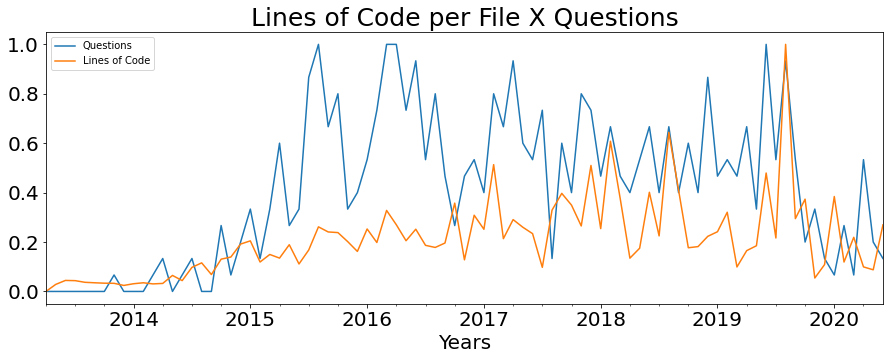

In [42]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
subplot = normalized_df["countLineCode/numberOfJavaFiles"].plot(figsize=(15,5), fontsize=20, legend=True, label="Lines of Code")
subplot.set_title("Lines of Code per File X Questions", fontsize=25)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/linhasVsQuestões.pdf",bbox_inches = 'tight')

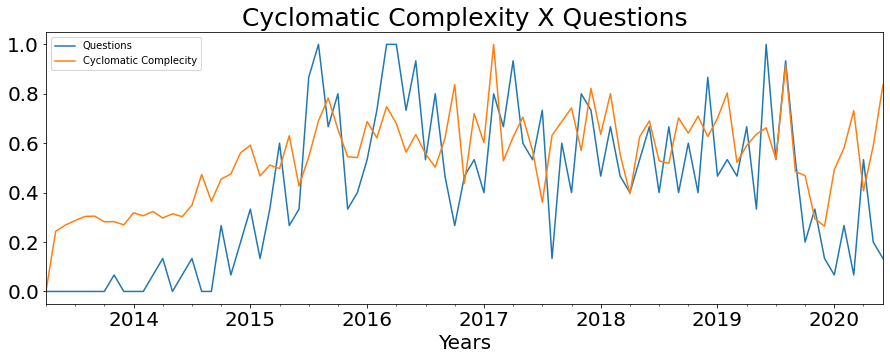

In [39]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
subplot = normalized_df["SumCyclomaticStrict/CountDeclMethod"].plot(figsize=(15,5), fontsize=20, legend=True, label="Cyclomatic Complecity")
subplot.set_title("Cyclomatic Complexity X Questions", fontsize=25)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/ccVsQuestões.pdf",bbox_inches = 'tight')

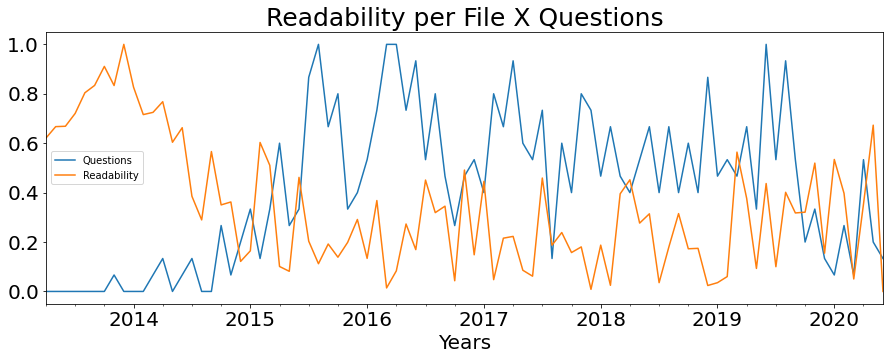

In [41]:
subplot = normalized_df["count_questions"].plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
subplot = normalized_df["readability"].plot(figsize=(15,5), fontsize=20, legend=True, label="Readability")
subplot.set_title("Readability per File X Questions", fontsize=25)
subplot.set_xlabel("Years", fontsize=20)
subplot.figure.savefig("SBCARS2020/readabilityVsQuestões.pdf",bbox_inches = 'tight')

***Obs1: no teste de correlaçao o primeiro valor da tupla é o coeficiente da correlação e o segundo valor da tupla é o p-value***

***Obs2: Todos os dados foram normalizados***